In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path_images = "../data/kvasir-seg/Kvasir-SEG/images"
path_masks = "../data/kvasir-seg/Kvasir-SEG/masks"

In [3]:
images_names = [str(img).split(".")[0] for img in os.listdir(path_images)]

In [4]:
directories = [
    "../data/kvasir-seg/Kvasir-SEG-processed/train/images",
    "../data/kvasir-seg/Kvasir-SEG-processed/train/masks",
    "../data/kvasir-seg/Kvasir-SEG-processed/test/images",
    "../data/kvasir-seg/Kvasir-SEG-processed/test/masks",
    "../data/kvasir-seg/Kvasir-SEG-processed/val/images",
    "../data/kvasir-seg/Kvasir-SEG-processed/val/masks",
] 
# create directories if they don't exist
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory, exist_ok=True)

In [5]:
for name in images_names:
    img_path = os.path.join(path_images, name + ".jpg")
    mask_path = os.path.join(path_masks, name + ".jpg")
    
    img = Image.open(img_path)
    mask = Image.open(mask_path)
    
    img = img.resize((128, 128), Image.BICUBIC) #.resize((256, 256))
    mask = mask.resize((128, 128), Image.NEAREST) #.resize((256, 256)).

    # generate random number between 0 and 1:
    # if it is less than 0.75 save the image in the training set, if >=0.75 and <0.95 save it in the test set, otherwise save it in the validation set
    random_number = np.random.rand()
    if random_number < 0.75:
        path_processed_images = "../data/kvasir-seg/Kvasir-SEG-processed/train/images"
        path_processed_masks = "../data/kvasir-seg/Kvasir-SEG-processed/train/masks"
    elif random_number >= 0.75 and random_number < 0.95:
        path_processed_images = "../data/kvasir-seg/Kvasir-SEG-processed/test/images"
        path_processed_masks = "../data/kvasir-seg/Kvasir-SEG-processed/test/masks"
    else:
        path_processed_images = "../data/kvasir-seg/Kvasir-SEG-processed/val/images"
        path_processed_masks = "../data/kvasir-seg/Kvasir-SEG-processed/val/masks"
    
    img.save(os.path.join(path_processed_images, name + ".jpg"))
    mask.save(os.path.join(path_processed_masks, name + ".jpg"))
    
    img.close()
    mask.close()

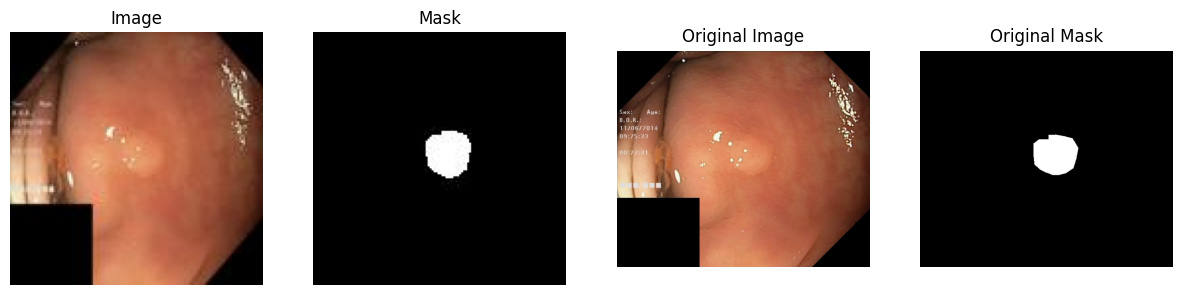

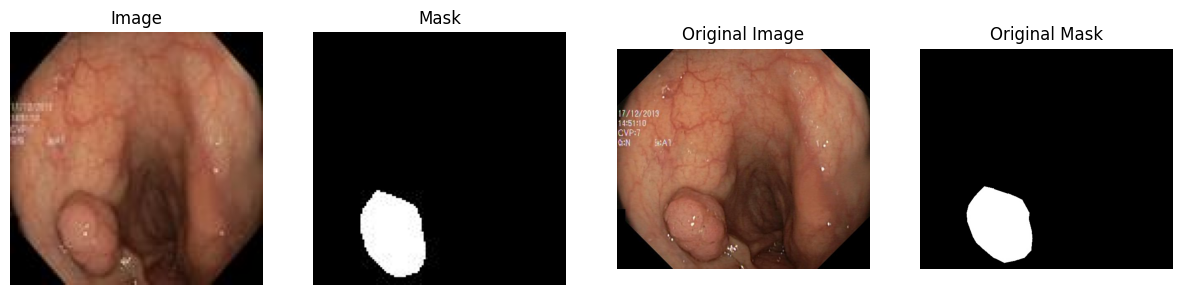

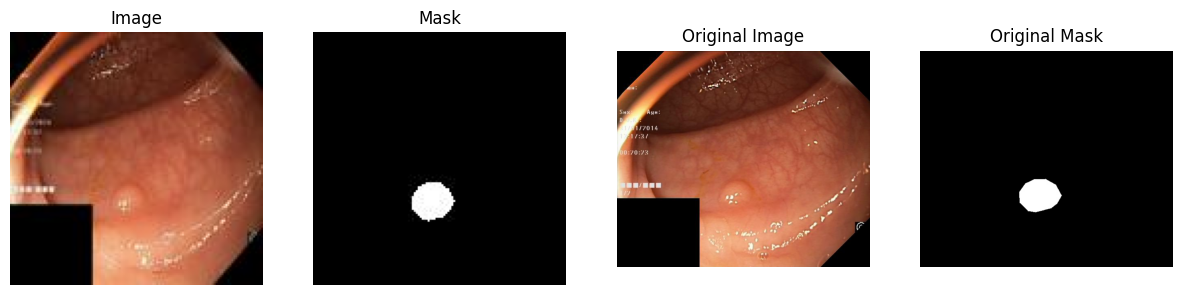

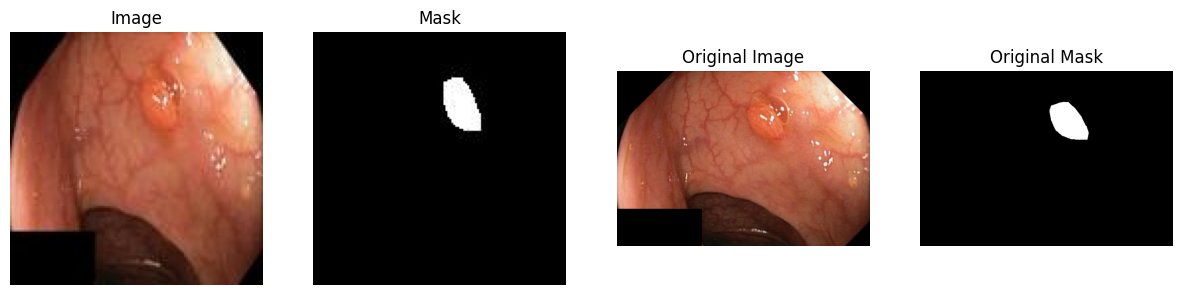

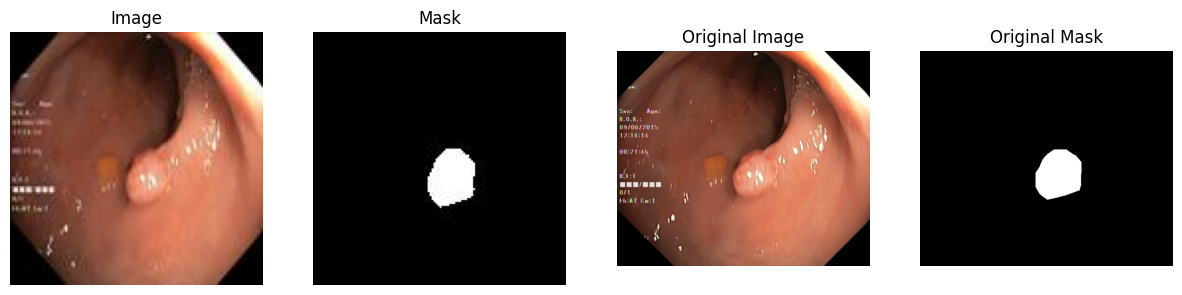

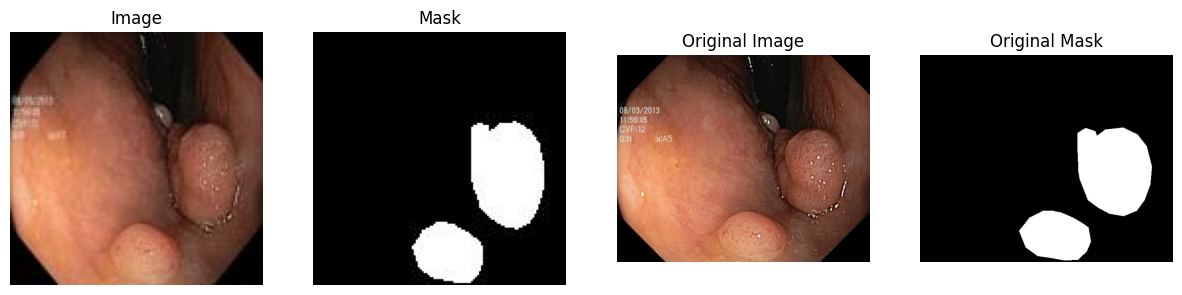

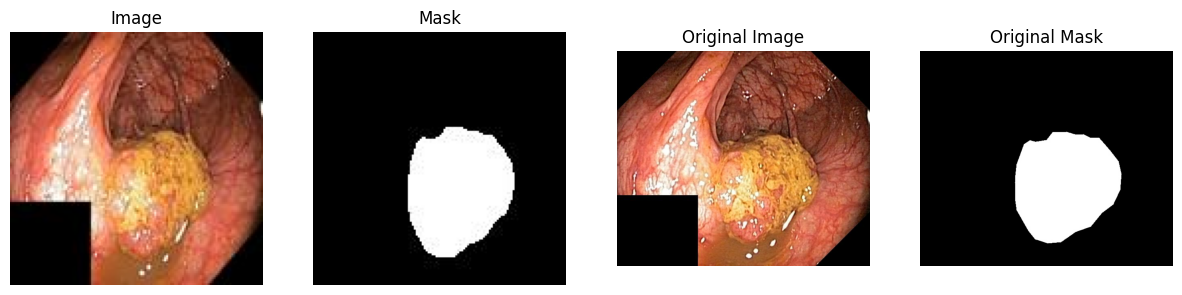

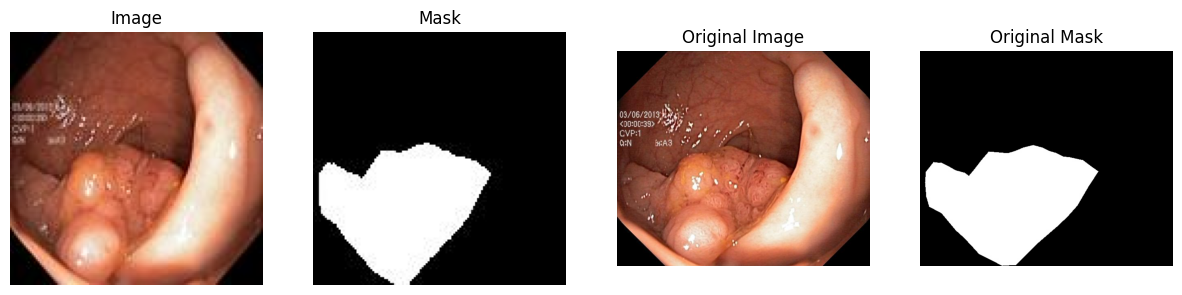

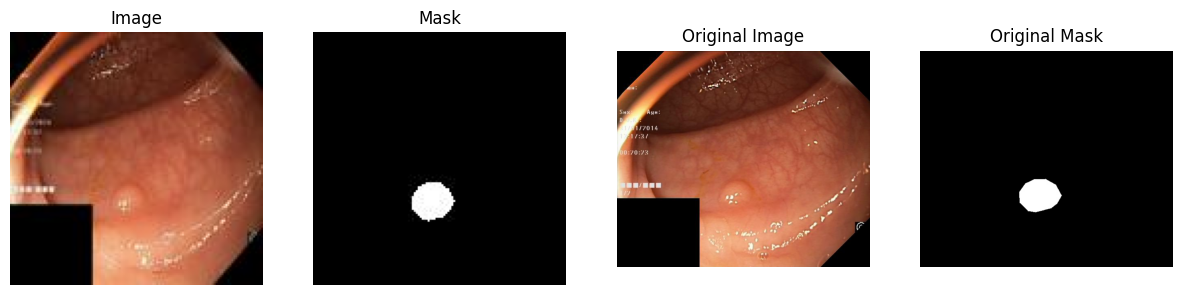

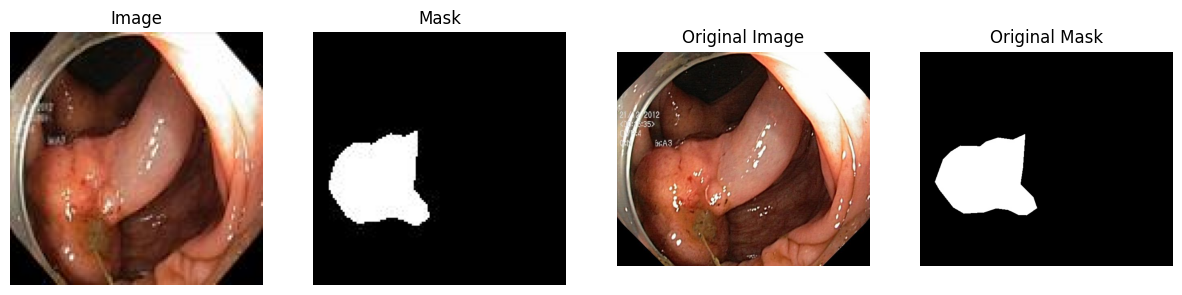

In [6]:
# read and display 10 random images and masks from the training set
images = os.listdir("../data/kvasir-seg/Kvasir-SEG-processed/train/images")
masks = os.listdir("../data/kvasir-seg/Kvasir-SEG-processed/train/masks")

for i in range(10):
    random_index = np.random.randint(0, len(images))
    img = Image.open(os.path.join("../data/kvasir-seg/Kvasir-SEG-processed/train/images", images[random_index]))
    mask = Image.open(os.path.join("../data/kvasir-seg/Kvasir-SEG-processed/train/masks", masks[random_index]))
    img_original = Image.open(os.path.join("../data/kvasir-seg/Kvasir-SEG/images", images[random_index]))
    mask_original = Image.open(os.path.join("../data/kvasir-seg/Kvasir-SEG/masks", masks[random_index]))
    
    fig, ax = plt.subplots(1, 4, figsize=(15, 10))
    ax[0].imshow(img)
    ax[0].axis("off")
    ax[0].set_title("Image")
    ax[1].imshow(mask)
    ax[1].axis("off")
    ax[1].set_title("Mask")
    ax[2].imshow(img_original)
    ax[2].axis("off")
    ax[2].set_title("Original Image")
    ax[3].imshow(mask_original)
    ax[3].axis("off")
    ax[3].set_title("Original Mask")
    plt.show()
    
    img.close()
    mask.close()